In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
salary=pd.read_csv(r"C:\Users\roopa\Desktop\Veer_Trainings\Python, AIML, DS\AIML\Salary_Data.csv")

In [3]:
#data wrangling steps
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
#DV= salary
#IV= Experience, both are numerical data and continuous, so no need to numerically code, and also use Linear Regression 
# as the algo for our model
X=salary.iloc[:,0].values
X=X.reshape(10,3) #imp to have it as a 2D array, otherwise lin_reg.fit throws an error
Y=salary.iloc[:,1].values
Y=Y.reshape(10,3)
X,Y

(array([[ 1.1,  1.3,  1.5],
        [ 2. ,  2.2,  2.9],
        [ 3. ,  3.2,  3.2],
        [ 3.7,  3.9,  4. ],
        [ 4. ,  4.1,  4.5],
        [ 4.9,  5.1,  5.3],
        [ 5.9,  6. ,  6.8],
        [ 7.1,  7.9,  8.2],
        [ 8.7,  9. ,  9.5],
        [ 9.6, 10.3, 10.5]]),
 array([[ 39343.,  46205.,  37731.],
        [ 43525.,  39891.,  56642.],
        [ 60150.,  54445.,  64445.],
        [ 57189.,  63218.,  55794.],
        [ 56957.,  57081.,  61111.],
        [ 67938.,  66029.,  83088.],
        [ 81363.,  93940.,  91738.],
        [ 98273., 101302., 113812.],
        [109431., 105582., 116969.],
        [112635., 122391., 121872.]]))

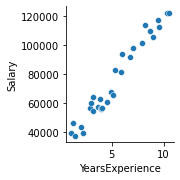

In [5]:
sns.pairplot(salary,x_vars=['YearsExperience'], y_vars=['Salary'])

In [6]:
# we dont have to chk for multicollinearity because we have only one dependent variable

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=66)

In [8]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
Y_pred=lin_reg.predict(X_test)
Y_pred

array([[ 36497.66400877,  27827.25374518,  41849.06145219],
       [105766.78747159, 120729.09583061, 117850.81345665],
       [119473.35604963, 130722.8973176 , 133964.57703434]])

In [9]:
#evaluation
def MAPE(a,b):
    return np.mean(np.abs((a-b)/a))*100

MAPE(Y_pred,Y_test)

13.506849722899556

In [10]:
from sklearn.metrics import r2_score
r2_score(Y_pred,Y_test)

0.9500028927197454

### ---------------

In [11]:
#good model